In [82]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [83]:
df = pd.read_csv('HCLTECH.NS.csv')
# df = pd.read_csv('INFY.NS.csv')
# df = pd.read_csv('ICICIBANK.NS.csv')
# df = pd.read_csv('KOTAKBANK.NS.csv')
# df = pd.read_csv('YESBANK.NS.csv')
# df = pd.read_csv('INDUSINDBNK.NS.csv')
# df = pd.read_csv('TCS.NS.csv')
# df = pd.read_csv('TECHM.NS.csv')
# df = pd.read_csv('HDFCBANK.NS.csv')
# df = pd.read_csv('SBIN.NS.csv')
# df = pd.read_csv('WIPRO.NS.csv')
# df = pd.read_csv('AXISBANK.NS.csv')





dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df1 = pd.read_csv('HCLTECH.NS.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
# df1 = pd.read_csv('INFY.NS.csv')
df1[['Open', 'High','Low', 'Close','Adj Close','Volume']] = df1[['Open', 'High','Low', 'Close','Adj Close','Volume']].apply(pd.to_numeric, errors='coerce')


df1["Open"].fillna(value=df1["Open"].mean(), inplace=True)
df1["High"].fillna(value=df1["High"].mean(), inplace=True)
df1["Low"].fillna(value=df1["Low"].mean(), inplace=True)
df1["Close"].fillna(value=df1["Close"].mean(), inplace=True)
df1["Adj Close"].fillna(value=df1["Adj Close"].mean(), inplace=True)
df1["Volume"].fillna(value=df1["Volume"].mean(), inplace=True)

df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,782.538700,792.230945,772.444299,782.446557,743.547388,2.018240e+06
std,154.397119,155.843213,152.497224,154.294016,160.986334,1.383781e+06
min,341.524994,351.424988,336.475006,342.125000,305.152893,0.000000e+00
25%,728.750000,737.375000,720.000000,729.524979,682.690063,1.179928e+06
50%,823.924988,833.000000,812.212494,823.924988,788.572418,1.672473e+06
75%,873.925018,882.012497,863.250015,873.725021,856.890625,2.463038e+06
max,1033.400024,1058.449951,1021.119995,1032.849976,1016.432373,1.504811e+07


In [84]:
ts = df1['Adj Close']
ts.head(10)

Date
2013-04-04    330.662018
2013-04-05    335.740631
2013-04-08    330.595459
2013-04-09    328.444275
2013-04-10    339.311157
2013-04-11    350.710175
2013-04-12    344.234406
2013-04-15    339.288910
2013-04-16    338.335327
2013-04-17    333.234497
Name: Adj Close, dtype: float64

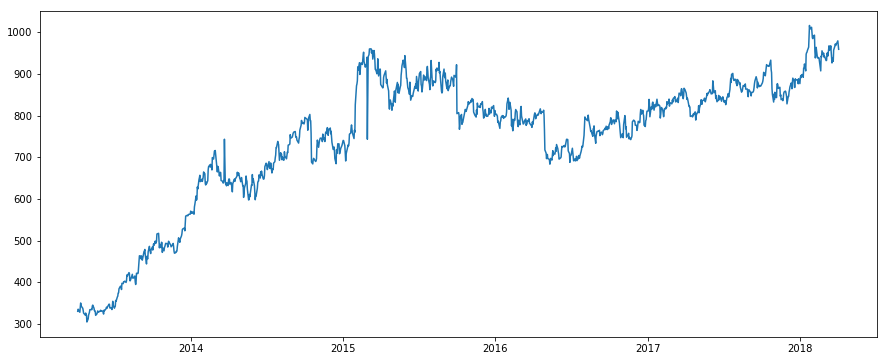

In [85]:
plt.plot(ts)

In [86]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


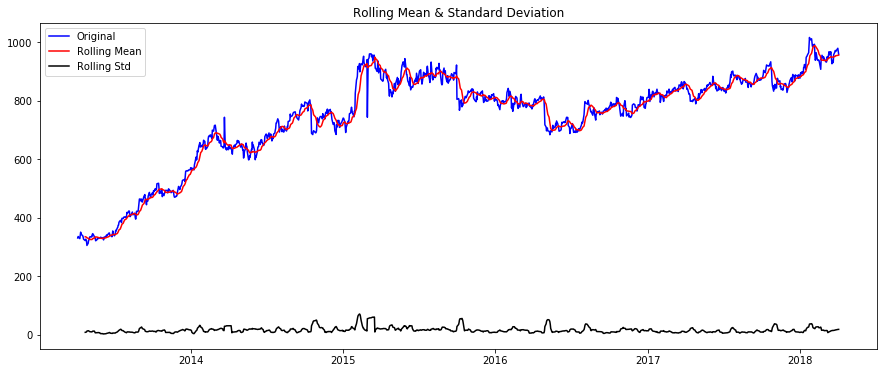

Results of Dickey-Fuller Test:
Test Statistic                   -2.236881
p-value                           0.193133
#Lags Used                        2.000000
Number of Observations Used    1229.000000
Critical Value (1%)              -3.435682
Critical Value (5%)              -2.863895
Critical Value (10%)             -2.568024
dtype: float64


In [87]:
test_stationarity(ts)

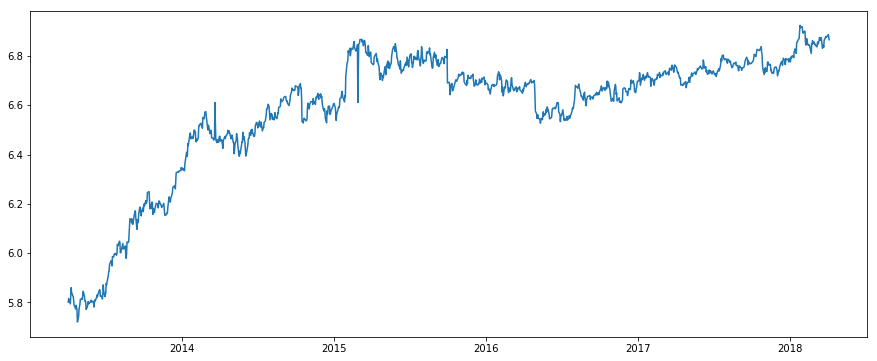

In [88]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


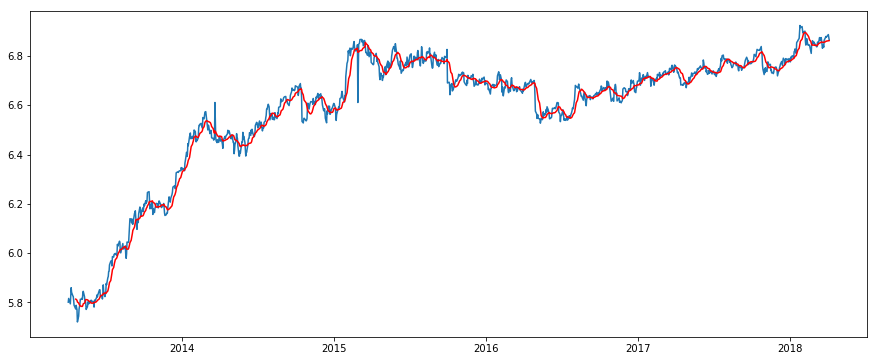

In [89]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [90]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2013-04-04         NaN
2013-04-05         NaN
2013-04-08         NaN
2013-04-09         NaN
2013-04-10         NaN
2013-04-11         NaN
2013-04-12         NaN
2013-04-15         NaN
2013-04-16         NaN
2013-04-17         NaN
2013-04-18         NaN
2013-04-22   -0.040212
Name: Adj Close, dtype: float64

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


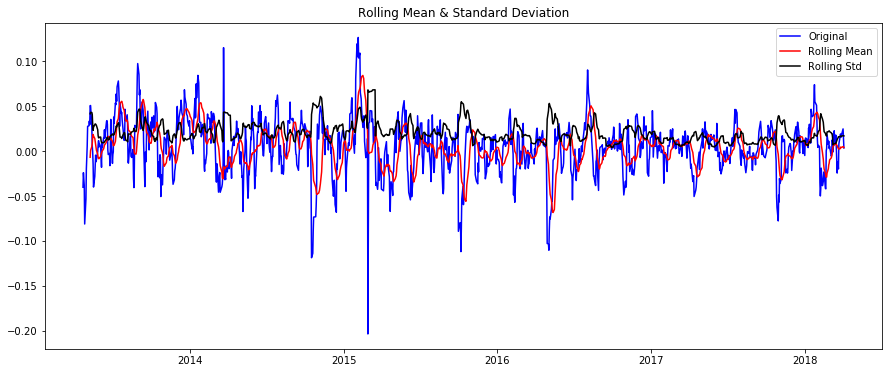

Results of Dickey-Fuller Test:
Test Statistic                -6.718327e+00
p-value                        3.535136e-09
#Lags Used                     1.800000e+01
Number of Observations Used    1.202000e+03
Critical Value (1%)           -3.435802e+00
Critical Value (5%)           -2.863948e+00
Critical Value (10%)          -2.568052e+00
dtype: float64


In [91]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


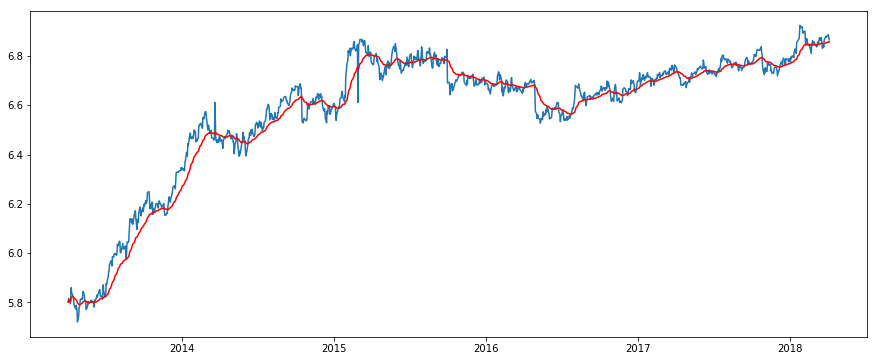

In [92]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


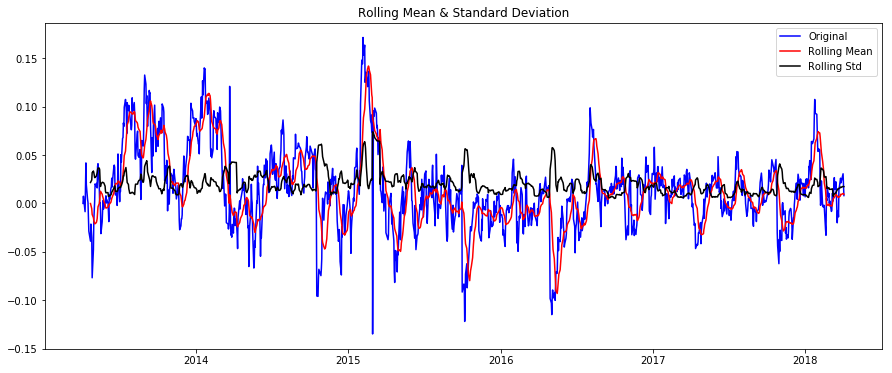

Results of Dickey-Fuller Test:
Test Statistic                -7.229717e+00
p-value                        2.009428e-10
#Lags Used                     1.000000e+00
Number of Observations Used    1.230000e+03
Critical Value (1%)           -3.435678e+00
Critical Value (5%)           -2.863893e+00
Critical Value (10%)          -2.568023e+00
dtype: float64


In [93]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

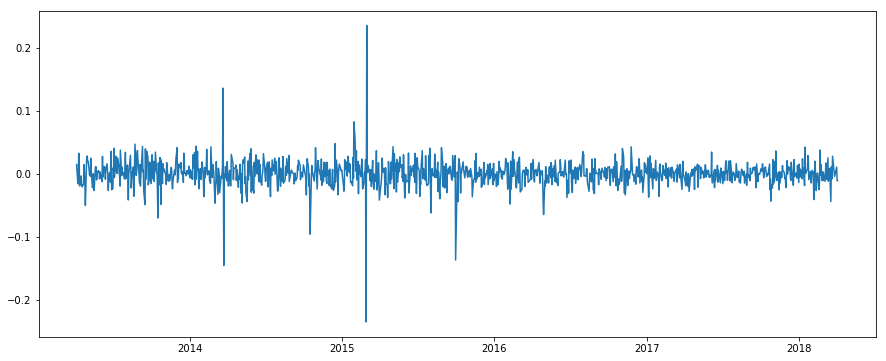

In [94]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


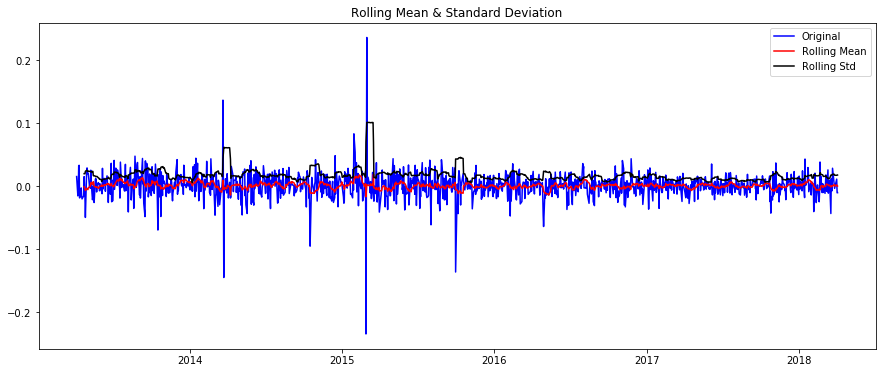

Results of Dickey-Fuller Test:
Test Statistic                  -27.890686
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1229.000000
Critical Value (1%)              -3.435682
Critical Value (5%)              -2.863895
Critical Value (10%)             -2.568024
dtype: float64


In [95]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


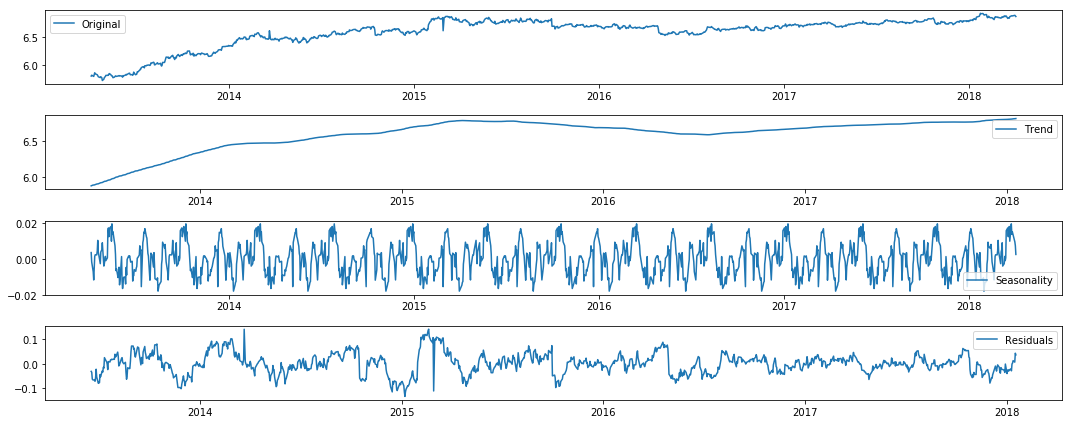

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=ts_log,freq=100)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


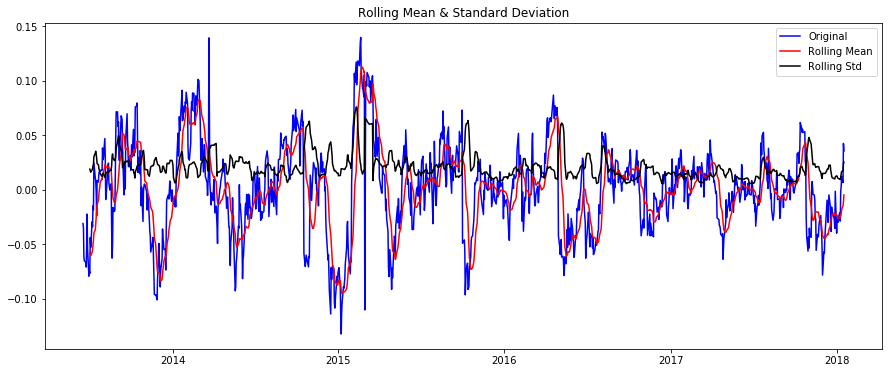

Results of Dickey-Fuller Test:
Test Statistic                -6.997724e+00
p-value                        7.458537e-10
#Lags Used                     1.000000e+00
Number of Observations Used    1.130000e+03
Critical Value (1%)           -3.436150e+00
Critical Value (5%)           -2.864101e+00
Critical Value (10%)          -2.568134e+00
dtype: float64


In [97]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [98]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [99]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

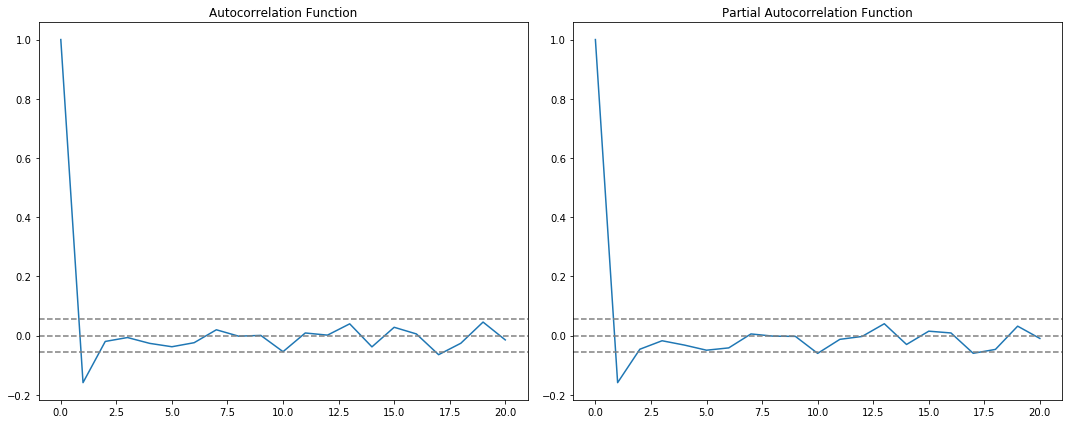

In [100]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [101]:
from statsmodels.tsa.arima_model import ARIMA

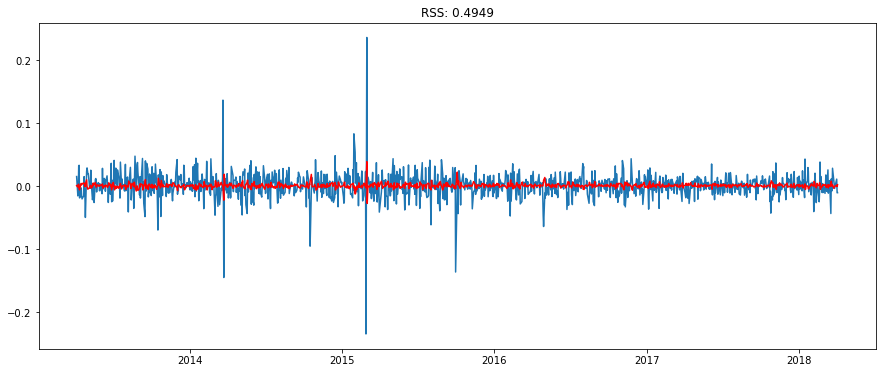

In [102]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

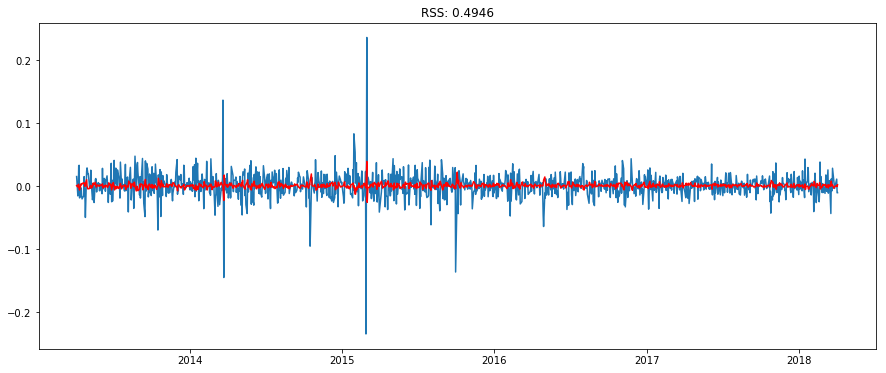

In [103]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


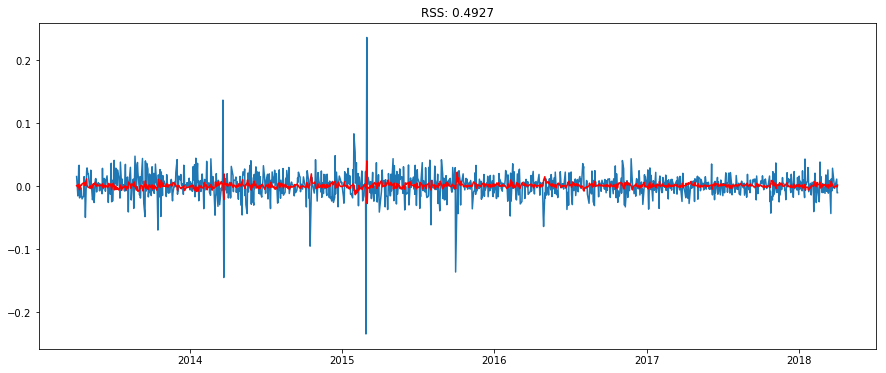

In [104]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [105]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

Date
2013-04-05    0.000865
2013-04-08   -0.001423
2013-04-09    0.002935
2013-04-10    0.002419
2013-04-11   -0.003873
2013-04-12   -0.005769
2013-04-15    0.001531
2013-04-16    0.002364
2013-04-17    0.001339
2013-04-18    0.003645
2013-04-22    0.005380
2013-04-23    0.005524
2013-04-25    0.000871
2013-04-26    0.005362
2013-04-29    0.011666
2013-04-30    0.001496
2013-05-02   -0.001460
2013-05-03   -0.001754
2013-05-06   -0.002840
2013-05-07   -0.000280
2013-05-08   -0.000845
2013-05-09    0.000493
2013-05-10   -0.004027
2013-05-13   -0.002003
2013-05-14    0.002802
2013-05-15    0.003689
2013-05-16    0.001584
2013-05-17    0.003093
2013-05-20    0.006476
2013-05-21    0.001476
                ...   
2018-02-19    0.002828
2018-02-20    0.006601
2018-02-21    0.004841
2018-02-22   -0.002989
2018-02-23    0.001443
2018-02-26   -0.001310
2018-02-27    0.002195
2018-02-28    0.000496
2018-03-01    0.002706
2018-03-05    0.001135
2018-03-06    0.003337
2018-03-07    0.001881
2018-0

In [106]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Date
2013-04-05    0.000865
2013-04-08   -0.000558
2013-04-09    0.002378
2013-04-10    0.004797
2013-04-11    0.000924
2013-04-12   -0.004845
2013-04-15   -0.003314
2013-04-16   -0.000950
2013-04-17    0.000389
2013-04-18    0.004034
2013-04-22    0.009414
2013-04-23    0.014938
2013-04-25    0.015809
2013-04-26    0.021172
2013-04-29    0.032837
2013-04-30    0.034334
2013-05-02    0.032874
2013-05-03    0.031119
2013-05-06    0.028279
2013-05-07    0.027999
2013-05-08    0.027154
2013-05-09    0.027647
2013-05-10    0.023620
2013-05-13    0.021617
2013-05-14    0.024420
2013-05-15    0.028109
2013-05-16    0.029692
2013-05-17    0.032785
2013-05-20    0.039262
2013-05-21    0.040738
                ...   
2018-02-19    1.030349
2018-02-20    1.036951
2018-02-21    1.041791
2018-02-22    1.038802
2018-02-23    1.040245
2018-02-26    1.038935
2018-02-27    1.041130
2018-02-28    1.041626
2018-03-01    1.044332
2018-03-05    1.045467
2018-03-06    1.048804
2018-03-07    1.050685
2018-0

In [107]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

Date
2013-04-04    5.801097
2013-04-05    5.801962
2013-04-08    5.800539
2013-04-09    5.803474
2013-04-10    5.805894
2013-04-11    5.802021
2013-04-12    5.796252
2013-04-15    5.797783
2013-04-16    5.800147
2013-04-17    5.801486
2013-04-18    5.805130
2013-04-22    5.810511
2013-04-23    5.816035
2013-04-25    5.816906
2013-04-26    5.822268
2013-04-29    5.833934
2013-04-30    5.835430
2013-05-02    5.833970
2013-05-03    5.832216
2013-05-06    5.829376
2013-05-07    5.829096
2013-05-08    5.828251
2013-05-09    5.828743
2013-05-10    5.824717
2013-05-13    5.822714
2013-05-14    5.825516
2013-05-15    5.829205
2013-05-16    5.830789
2013-05-17    5.833882
2013-05-20    5.840358
                ...   
2018-02-19    6.831446
2018-02-20    6.838047
2018-02-21    6.842888
2018-02-22    6.839899
2018-02-23    6.841342
2018-02-26    6.840032
2018-02-27    6.842226
2018-02-28    6.842722
2018-03-01    6.845429
2018-03-05    6.846564
2018-03-06    6.849901
2018-03-07    6.851782
2018-0

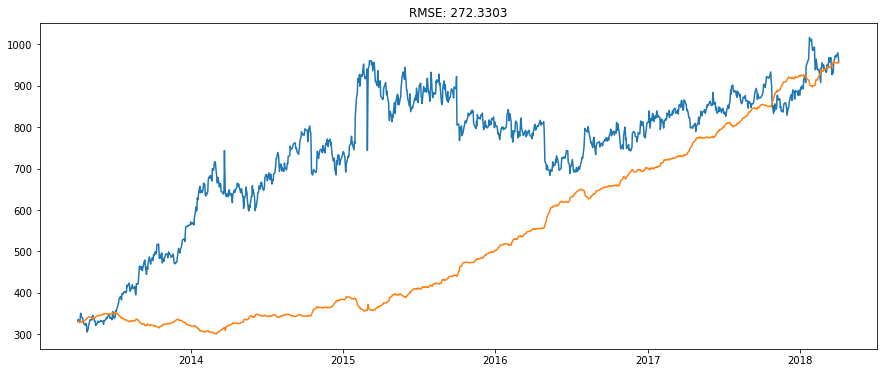

In [108]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))